<a href="https://colab.research.google.com/github/rosacarla/treinamento-duplo-RNC/blob/main/Treinamento_RNC_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # TREINAMENTO DUPLO DE REDE NEURAL COMPETITIVA - RNC  
> CURSO: TECNOLOGIA EM INTELIGÊNCIA ARTIFICIAL APLICADA  
> DISCIPLINA: REDES NEURAIS  
> PROFESSOR: EDSON RUSCHEL (autor do código original S7_RNC.py)  
> AUTORA: CARLA EDILA SILVEIRA  
> <p align='justify'>OBJETIVO: treinar as redes RNC para agrupamento de elementos de uma base de dados, considerando a relação entre duas duplas de variáveis; o primeiro treinamento relaciona cilindradas (em litros) e eficiência (em Km/L) de veículos automotores; o segundo treinamento relaciona a emissão de CO2 na atmosfera (em g/Km) e eficiência (em Km/L).<p/>  
> DATA: 19/09/2023
> </br>
<img src="https://i.postimg.cc/Bnbxg3Xr/redes-neurais.jpg" width=980 height=408>


In [552]:
# IMPORTAÇÃO DE BIBLIOTECAS

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [553]:
# CRIAÇÃO DA CLASSE PARA REDE NEURAL COMPETITIVA (RNC)

class RNC:
    def __init__(self, input_shape, num_neurons):
        self.input_shape = input_shape
        self.num_neurons = num_neurons
        self.weights = np.random.rand(num_neurons, input_shape)

    def train(self, input_data, learning_rate=0.1, num_epochs=5):
        progress_bar = tqdm(total=num_epochs, desc='Treinando', unit=' épocas', ncols=80)
        for epoch in range(num_epochs):
            for input_sample in input_data:
                winner_neuron = self.get_winner_neuron(input_sample)
                self.update_weights(input_sample, winner_neuron, learning_rate)
            progress_bar.set_postfix(epoch=epoch+1)
            progress_bar.update()
        progress_bar.close()

    def get_winner_neuron(self, input_sample):
        distances = np.linalg.norm(input_sample - self.weights, axis=1)
        return np.argmin(distances)

    def update_weights(self, input_sample, winner_neuron, learning_rate):
        self.weights[winner_neuron] += learning_rate * (input_sample - self.weights[winner_neuron])

    def predict(self, input_data):
        predictions = []
        for input_sample in input_data:
            winner_neuron = self.get_winner_neuron(input_sample)
            predictions.append(winner_neuron)
        return predictions

In [554]:
# MONTAGEM DO DRIVE PARA CARREGAR DADOS

# from google.colab import drive
# drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [555]:
# CARREGAMENTO DO CONJUNTO DE DADOS

# Carrega conjunto de dados "base_veiculos(1)_S7.csv"
# Caminho no desktop 'C:/RN/base_veiculos(1)_S7.csv'
data = pd.read_csv('/content/gdrive/MyDrive/RN/base_veiculos(1)_S7.csv')

# Exibe 5 primeiros registros do dataset
data.head()

,Make,Model,Cilindrada,Eficiencia,CO2
0,Alfa Romeo,GT V6 2.5,2.5,8.502880,276.106975
1,Alfa Romeo,GT V6 2.5,2.5,8.502880,276.106975
2,Alfa Romeo,Spider Veloce 2000,2.0,8.928024,262.959024
3,Alfa Romeo,Spider Veloce 2000,2.0,8.928024,262.959024
4,AM General,DJ Po Vehicle 2WD,2.5,7.227448,324.831736


In [556]:
# Exibe 5 ultimos registros do dataset

data.tail()

,Make,Model,Cilindrada,Eficiencia,CO2
37962,Volvo,XC60 FWD,2.0,11.053744,216.237712
37963,Volvo,XC90 AWD,2.0,9.353168,247.927722
37964,Volvo,XC90 AWD,2.0,9.778312,238.607131
37965,Volvo,XC90 AWD PHEV,2.0,10.628600,147.886711
37966,Volvo,XC90 FWD,2.0,10.203456,231.772031


In [557]:
# CONFIGURACAO DA BASE DE DADOS

# Extrai colunas de interesse
columns = ['Cilindrada', 'Eficiencia', 'CO2']
data = data[columns]

# Remove linhas com valores em branco ou zero
data = data.dropna()
data = data[(data != 0).all(axis=1)]

# Converte colunas em arrays numpy
cilindrada = data['Cilindrada'].values
eficiencia = data['Eficiencia'].values
co2 = data['CO2'].values

# Concatenação de dados combinados em um único array

# Cilindrada x Eficiencia
combinacao1 = np.column_stack((cilindrada, eficiencia))
inshape1 = combinacao1.shape[1]

# Cilindrada x CO2
combinacao2 = np.column_stack((cilindrada, co2))
inshape2 = combinacao2.shape[1]

In [558]:
# Exibe dataset configurado

data.head()

,Cilindrada,Eficiencia,CO2
0,2.5,8.502880,276.106975
1,2.5,8.502880,276.106975
2,2.0,8.928024,262.959024
3,2.0,8.928024,262.959024
4,2.5,7.227448,324.831736


In [599]:
# CONFIGURAÇÃO DA ESTRUTURA DA REDE NEURAL COMPETITIVA

# DEFINE QUANTIDADE DE NEURÔNIOS DAS REDES
num_neur_rnc1 = 3
num_neur_rnc2 = 3

# DEFINE NUMERO DE EPOCAS PARA TREINAMENTO DAS REDES
epocas_rnc1 = 10
epocas_rnc2 = 20

# DEFINE TAXA DE APRENDIZADO DAS REDES
taxa_aprend_rnc1 = 0.01
taxa_aprend_rnc2 = 1.00

# CONFIGURACAO DA ORDEM DE CADA POLINOMIO PARA REGRESSAO LINEAR

# Ordem do Polinomio para Regressao Cilindrada X Eficiencia
ordem_pol1 = 2

# Ordem do Polinomio para Regressao Cilindrada X CO2
ordem_pol2 = 12

# INFORMAÇÃO DE PARÂMETROS PARA PREVISÃO

# Informa um valor de Cilindrada (em L) para prever a Eficiencia (em Km/L)
cilindrada1_info = 1.8

# Informa um valor de Cilindrada (em L) para prever a Emissao de CO2 (em g/Km)
cilindrada2_info = 8.2

In [601]:
# CRIAÇÃO DA REDE NEURAL COMPETITIVA

# Criacao da Rede Neural Competitiva 1
rnc1 = RNC(input_shape=inshape1, num_neurons=num_neur_rnc1)

# Criacao da Rede Neural Competitiva 2
rnc2 = RNC(input_shape=inshape2, num_neurons=num_neur_rnc2)

In [602]:
# TREINAMENTO DA REDE NEURAL COMPETITIVA

# Treinamento da Rede Neural Competitiva 1
rnc1.train(combinacao1, learning_rate=taxa_aprend_rnc1, num_epochs=epocas_rnc1)

# Treinamento da Rede Neural Competitiva 2
rnc2.train(combinacao2, learning_rate=taxa_aprend_rnc2, num_epochs=epocas_rnc2)

Treinando: 100%|█████████████████| 20/20 [00:16<00:00,  1.21 épocas/s, epoch=20]


In [603]:
# PREDIÇÕES DA REDE NEURAL COMPETITIVA

# Realizar a predição cilindrada x kmpl
predictions1 = rnc1.predict(combinacao1)

# Realizar a predição cilindrada x co2
predictions2 = rnc2.predict(combinacao2)

In [604]:
# CALCULAR OS POLINOMIOS DAS REGRESSOES

# Calculo do polinomio para Cilindrada X Eficiencia
coefficients1 = np.polyfit(cilindrada, eficiencia, ordem_pol1)
polynomial1 = np.poly1d(coefficients1)

# Calculo do polinomio para Cilindrada X Emissao de CO2
coefficients2 = np.polyfit(cilindrada, co2, ordem_pol2)
polynomial2 = np.poly1d(coefficients2)

In [605]:
# GERAR TABELAS DE AGRUPAMENTOS (CLUSTERS)

# Tabela Cilindrada vs. Eficiencia

table_data1 = {'Cil.': cilindrada,
              'Efic.': eficiencia,
              'Group': predictions1}

df_table1 = pd.DataFrame(table_data1)

grouped_table1 = df_table1.groupby('Group').agg({'Cil.': ['min', 'max'],
                                               'Efic.': ['min', 'max'],
                                               'Group': 'size'})

grouped_table1.columns = ['Cil. (min)', 'Cil. (max)', 'Efic. (min)',
                          'Efic. (max)', 'Elementos']

# Formatar valores reais para duas casas decimais
grouped_table1 = grouped_table1.round(decimals=2)

# Tabela Cilindrada vs. Emissao de CO2

table_data2 = {'Cil.': cilindrada,
              'CO2': co2,
              'Group': predictions2}

df_table2 = pd.DataFrame(table_data2)

grouped_table2 = df_table2.groupby('Group').agg({'Cil.': ['min', 'max'],
                                               'CO2': ['min', 'max'],
                                               'Group': 'size'})

grouped_table2.columns = ['Cil. (min)', 'Cil. (max)',
                         'CO2 (min)', 'CO2 (max)', 'Elementos']

# Formatar valores reais para duas casas decimais
grouped_table2 = grouped_table2.round(decimals=2)

In [606]:
# PREVISÕES DA REGRESSÃO

# Preve valor de Eficiencia correspondente a Cilindrada informada
previsao_y1 = polynomial1(cilindrada1_info)
previsao_y1 = '{:.2f}'.format(previsao_y1)

# Prever valor de Emissao de CO2 correspondente a Cilindrada informada
previsao_y2 = polynomial2(cilindrada2_info)
previsao_y2 = '{:.2f}'.format(previsao_y2)

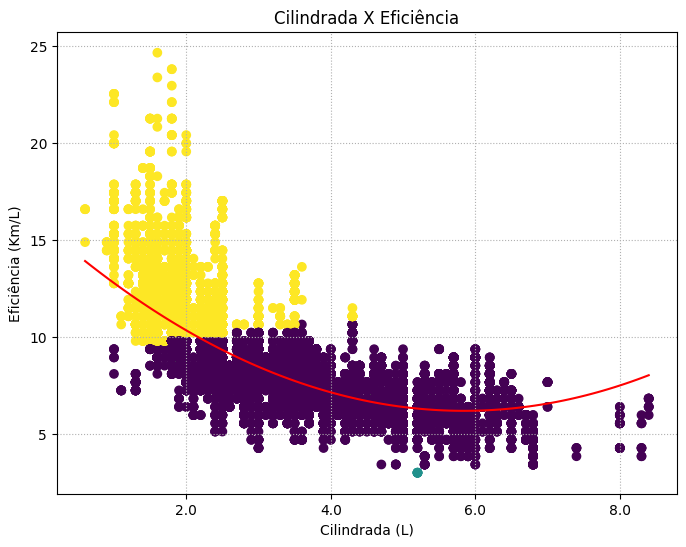

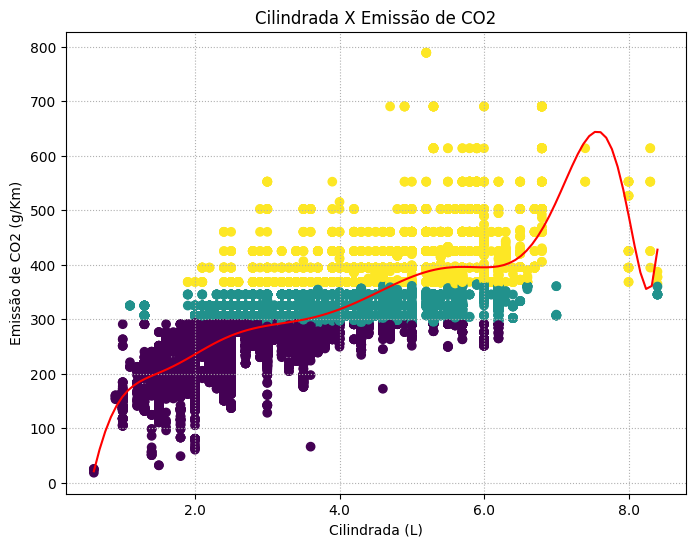

In [607]:
# PLOTAGEM DOS RESULTADOS EM GRÁFICOS DE DISPERSÃO

# Cilindrada (L) X Eficiencia (Km/L)

# Obtem termos do polinomio formatados
terms1 = []

for i, coeff in enumerate(polynomial1.coeffs):
    power1 = polynomial1.order - i
    term1 = f"{coeff:.2f}x^{power1}" if power1 > 1 else f"{coeff:.2f}x" if power1 == 1 else f"{coeff:.2f}"
    terms1.append(term1)

# Constroi string da funcao f(x)
function_str1 = "f(x) = " + " + ".join(terms1)

# Plota grafico de dispersao
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cilindrada, eficiencia, c=predictions1)
ax.set_xlabel("Cilindrada (L)")
ax.set_ylabel("Eficiência (Km/L)")
ax.set_title("Cilindrada X Eficiência")
ax.set_xticks(np.arange(0, np.max(cilindrada) + 2, 2))
ax.set_xticklabels(['%.1f' % x for x in np.arange(0, np.max(cilindrada) + 2, 2)])
ax.grid(linestyle='dotted')

# Plota linha de regressao
x_values = np.linspace(np.min(cilindrada), np.max(cilindrada), 100)
y_values = polynomial1(x_values)
ax.plot(x_values, y_values, color='red')

plt.show()
print() # Imprime linha em branco par separar imagens dos graficos

# Cilindrada (L) X Emissao de CO2 (g/Km)

# Obtem termos do polinomio formatados
terms2 = []

for i, coeff in enumerate(polynomial2.coeffs):
    power2 = polynomial2.order - i
    term2 = f"{coeff:.2f}x^{power2}" if power2 > 1 else f"{coeff:.2f}x" if power2 == 1 else f"{coeff:.2f}"
    terms2.append(term2)

# Constroi string da funcao f(x)
function_str2 = "f(x) = " + " + ".join(terms2)

# Plota grafico de dispersao
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cilindrada, co2, c=predictions2)
ax.set_xlabel("Cilindrada (L)")
ax.set_ylabel("Emissão de CO2 (g/Km)")
ax.set_title("Cilindrada X Emissão de CO2")
ax.set_xticks(np.arange(0, np.max(cilindrada) + 2, 2))
ax.set_xticklabels(['%.1f' % x for x in np.arange(0, np.max(cilindrada) + 2, 2)])
ax.grid(linestyle='dotted')

# Plota linha de regressao
x_values = np.linspace(np.min(cilindrada), np.max(cilindrada), 100)
y_values = polynomial2(x_values)
ax.plot(x_values, y_values, color='red')

plt.show()

In [608]:
# APRESENTAÇÃO DAS TABELAS COM CLUSTERS

print('\n' + '=' * 70)
print('TABELAS DE AGRUPAMENTO (CLUSTERS)')
print('=' * 70)
print('\n' * 1)

# Tabela Cilindrada (L) vs. Eficiencia (Km/L)
print("Tabela 1. Cilindrada (L) X Eficiência (Km/L)")
print('_' * 70)
print(grouped_table1)
print('_' * 70)
print('\n' * 2)

# Tabela Cilindrada (L) vs. Emissao de CO2 (g/Km)
print("Tabela 2. Cilindrada (L) X Emissão de CO2 (g/Km)")
print('_' * 70)
print(grouped_table2)
print('_' * 70)
print('\n' * 2)


TABELAS DE AGRUPAMENTO (CLUSTERS)


Tabela 1. Cilindrada (L) X Eficiência (Km/L)
______________________________________________________________________
       Cil. (min)  Cil. (max)  Efic. (min)  Efic. (max)  Elementos
Group                                                             
0             1.0         8.4         3.40        10.63      30238
1             5.2         5.2         2.98         2.98          5
2             0.6         4.3         9.78        24.66       7724
______________________________________________________________________



Tabela 2. Cilindrada (L) X Emissão de CO2 (g/Km)
______________________________________________________________________
       Cil. (min)  Cil. (max)  CO2 (min)  CO2 (max)  Elementos
Group                                                         
0             0.6         6.2      18.02     292.05      21854
1             1.1         8.4     292.67     363.50       8939
2             1.9         8.4     364.75     788.88       7174
___

In [609]:
# APRESENTAÇÃO DE PREVISÕES DAS REGRESSÕES

print('\n' + '=' * 70)
print('PREVISÕES DAS REGRESSÕES')
print('=' * 70)
print('\n' * 1)

# Imprime resultados da funcao f(x) para Cilindrada vs. Eficiencia
print('Função polinomial para Cilindrada X Eficiência')
print('_' * 70)
print(function_str1 + '\n')
print("Cilindrada informada:", cilindrada1_info, "L")
print("Eficiência prevista:", previsao_y1, "Km/L")
print('_' * 70)
print('\n' * 1)

# Imprime resultados da funcao f(x) para Cilindrada vs. Emissao de CO2
print('Função polinomial para Cilindrada X Emissão de CO2')
print('_' * 70)
print(function_str2 + '\n')
print("Cilindrada informada:", cilindrada2_info, "L")
print("Emissão de CO2 prevista:", previsao_y2, "g/Km")
print('_' * 70)
print('\n' * 1)


PREVISÕES DAS REGRESSÕES


Função polinomial para Cilindrada X Eficiência
______________________________________________________________________
f(x) = 0.28x^2 + -3.29x + 15.77

Cilindrada informada: 1.8 L
Eficiência prevista: 10.77 Km/L
______________________________________________________________________


Função polinomial para Cilindrada X Emissão de CO2
______________________________________________________________________
f(x) = 0.00x^12 + -0.04x^11 + 0.85x^10 + -10.95x^9 + 91.72x^8 + -521.47x^7 + 2043.13x^6 + -5479.47x^5 + 9765.60x^4 + -10856.93x^3 + 6553.44x^2 + -1281.47x + -146.32

Cilindrada informada: 8.2 L
Emissão de CO2 prevista: 368.45 g/Km
______________________________________________________________________




> ## EXECUÇÕES DOS MODELOS COM AJUSTES DE PARÂMETROS NUMÉRICOS  
> <b>1a. execução</b>  
> Parâmetros: num_neur_rnc1 = 3/num_neur_rnc2 = 5; epocas_rnc1 = 10/epocas_rnc2 = 1; taxa_aprend_rnc1 = 0.01/taxa_aprend_rnc2 = 2.00; ordem_pol1 = 1/ordem_pol2 = 10</br>
> </br>
> <img src="https://i.postimg.cc/rs39bGfL/1exe-dupla-rnc.png">  
> <br/>
> <b>2a. execução</b>  
> Parâmetros: num_neur_rnc1 = 3/num_neur_rnc2 = 5; epocas_rnc1 = 16/epocas_rnc2 = 8; taxa_aprend_rnc1 = 0.01/taxa_aprend_rnc2 = 2.00; ordem_pol1 = 1/ordem_pol2 = 10</br>
> <br/>
> <img src="https://i.postimg.cc/htcJthZB/2exe-dupla-rnc.png">  
> <br/>
> <b>3a. execução</b>  
> Parâmetros: num_neur_rnc1 = 3/num_neur_rnc2 = 3; epocas_rnc1 = 10/epocas_rnc2 = 20; taxa_aprend_rnc1 = 0.01/taxa_aprend_rnc2 = 1.00; ordem_pol1 = 1/ordem_pol2 = 10</br>
> <br/>
> <img src="https://i.postimg.cc/1X0ChJ36/3exe-dupla-rnc.png">  
> <br/>
> <b>4a. execução</b>  
> Parâmetros: num_neur_rnc1 = 3/num_neur_rnc2 = 3; epocas_rnc1 = 10/epocas_rnc2 = 20; taxa_aprend_rnc1 = 0.01/taxa_aprend_rnc2 = 1.00; ordem_pol1 = 2/ordem_pol2 = 12</br>
> <br/>
> <img src="https://i.postimg.cc/sXXF9Bs7/4exe-dupla-rnc.png">  



> ## DISCUSSÃO DOS RESULTADOS  
> <p align='justify'>O ajuste de parâmetros numéricos que proporcionou melhor desempenho das redes foram: redução da quantidade de neurônios para 3 em ambos os modelos, assim propiciou encontrar 3 grupos ou clusters; aumento do número de épocas para 20 na RNC2; redução da taxa de aprendizado para 1 na RNC2; aumento da ordem de polinômios para 2 na RNC1 e para 12 na RNC2.</p>
> <p align='justify'>Essas alterações resultaram em agrupamento compatível com a quantidade de neurônios, o que não aconteceu enquanto a estrutura continha os valores 4 e 8 na execução da versão inicial do código e 3 e 5 nas duas primeiras baterias do treinamento.</p>
> <p align='justify'>Como a RNC1 apresentou resultados adequados à quantidade de neurônios na maioria das baterias, optou-se por alterar parâmetros de épocas e taxa de aprendizado da RNC2.</p>
> <p align='justify'>Já a ordem de polinômios foi um parâmetro cujas combinações geraram erros na execução dos dois modelos, até que se encontrassem as opções adequadas para a melhoria dos resultados.</p>